In [150]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import seaborn as sb
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv("diabetes_data.csv")

In [152]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0


In [153]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000


d:\final_practice_aa\env\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


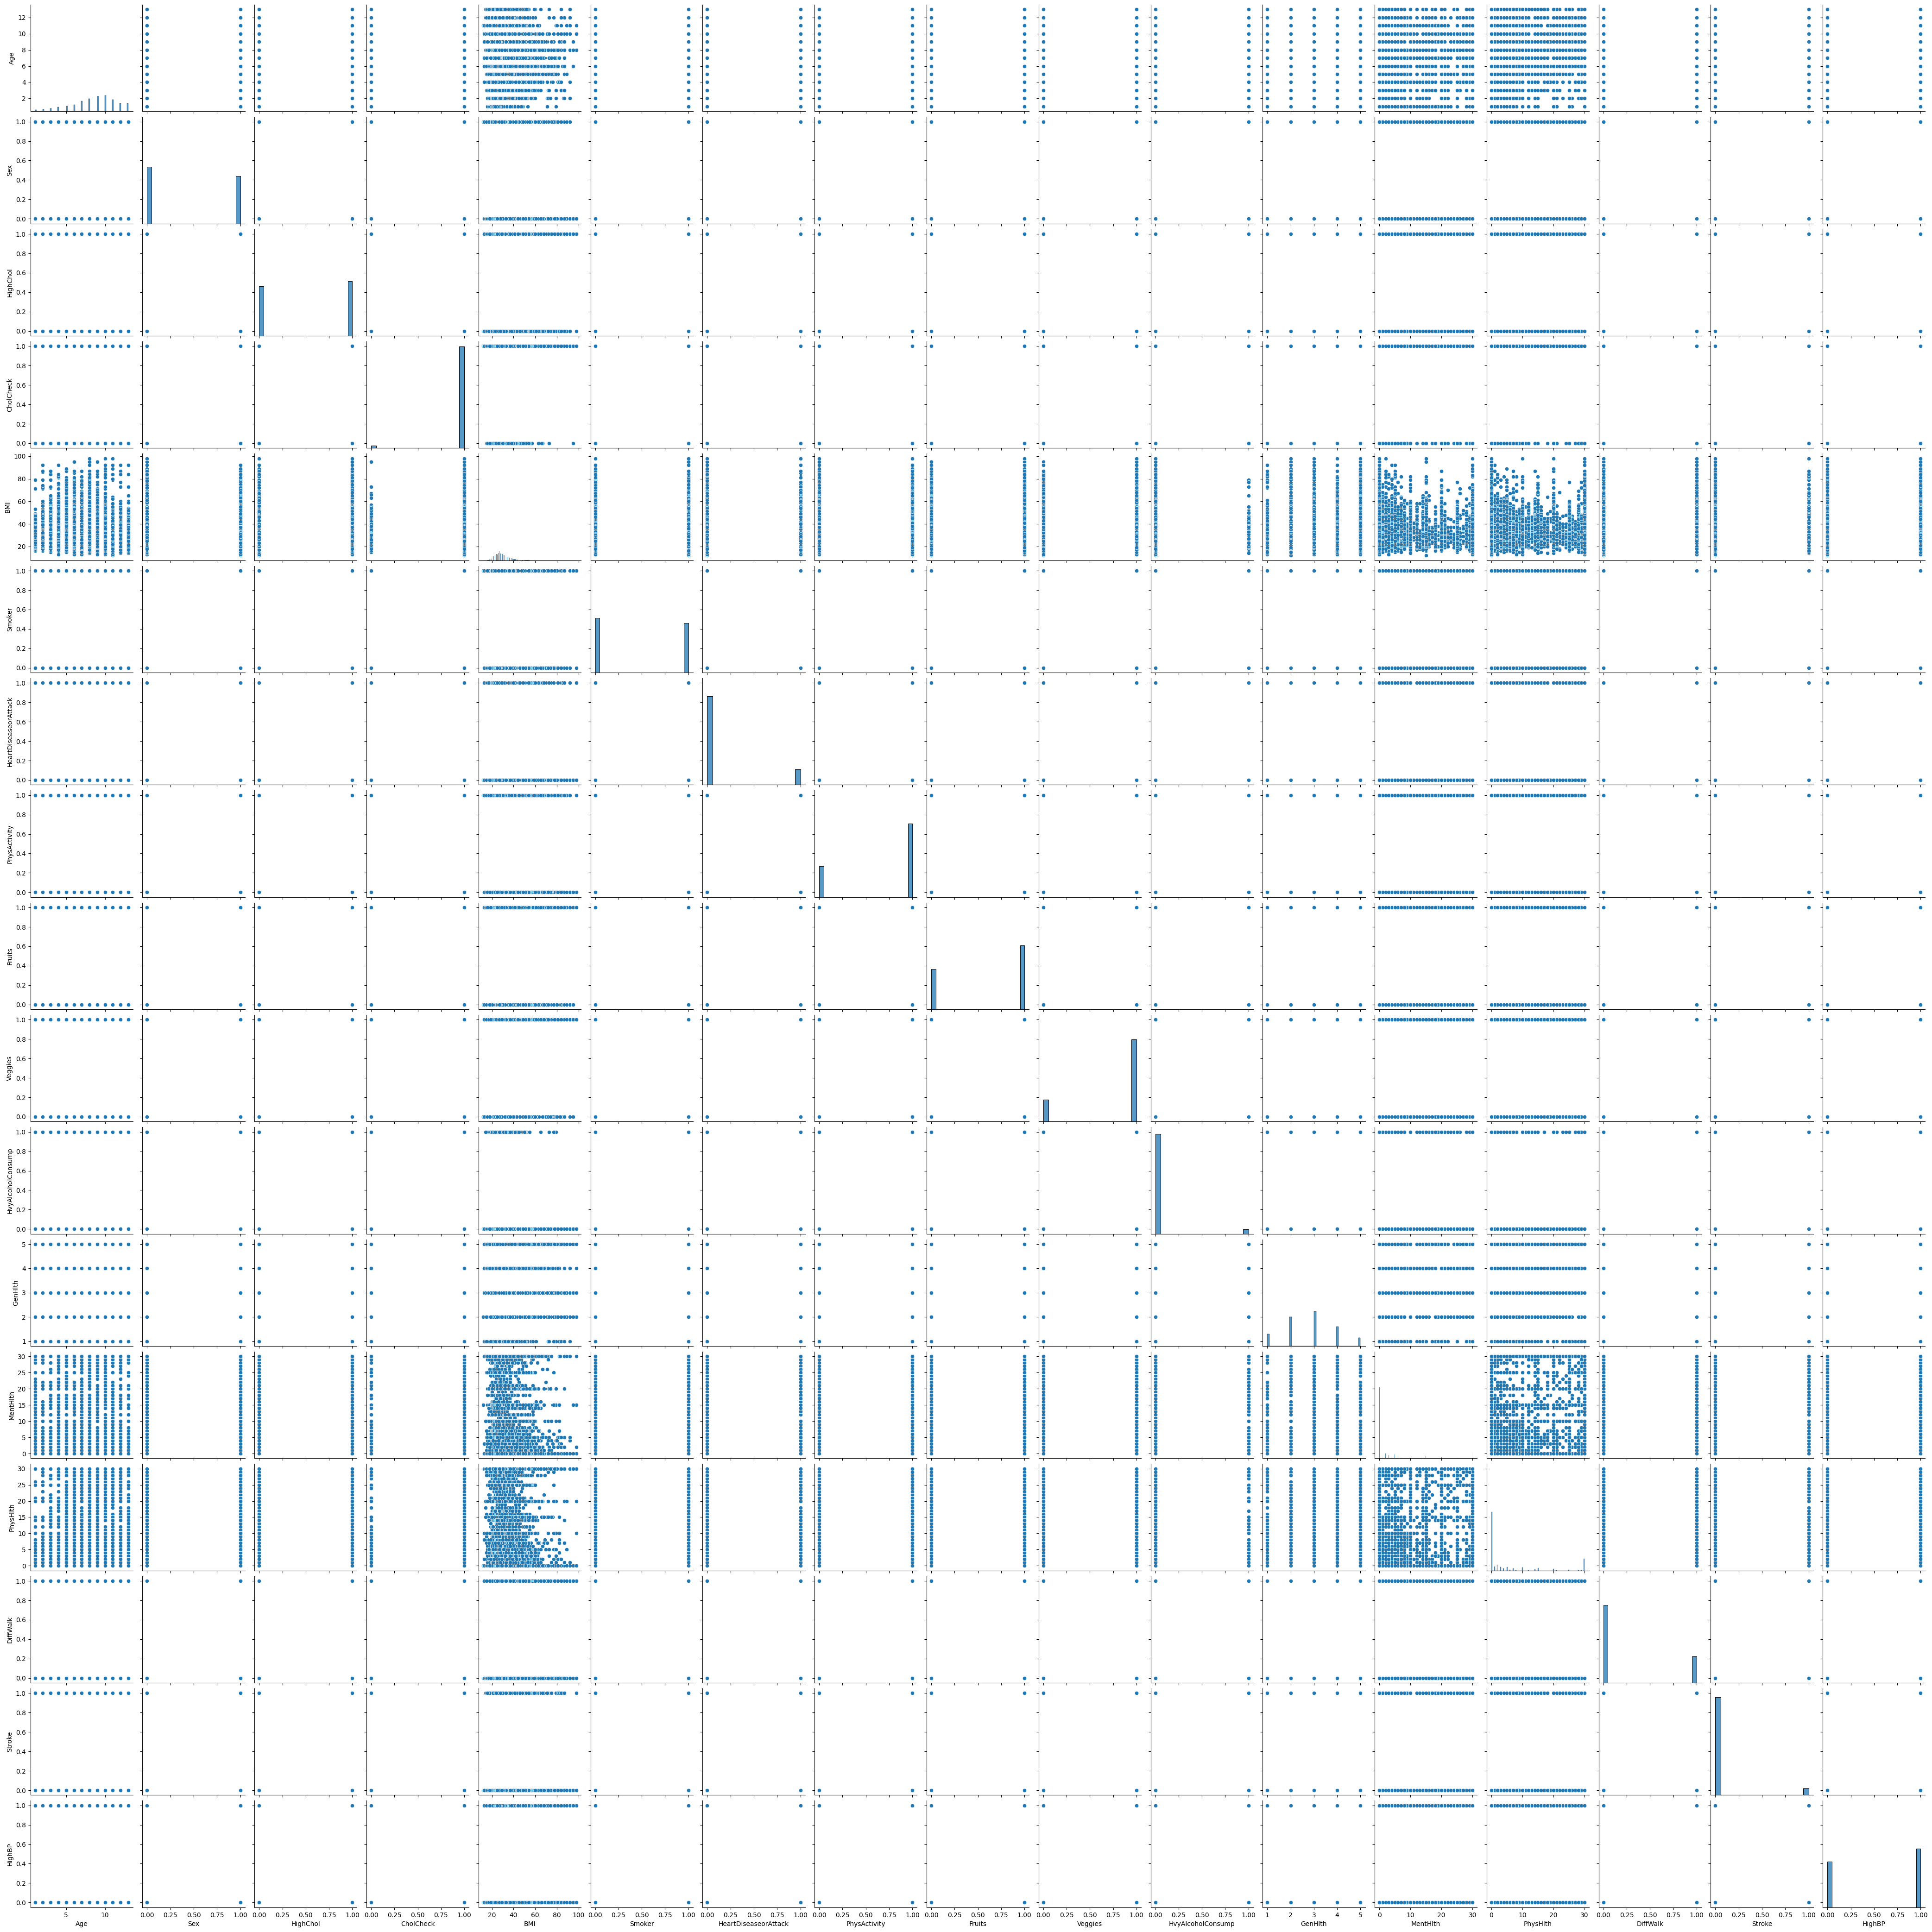

In [161]:
sb.pairplot(df)

In [155]:
data_x = df.drop(["HvyAlcoholConsump"], axis=1)
data_y = df["HvyAlcoholConsump"]

In [156]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.1)

In [157]:
# Esto sirve para saber cuantos datos tiene la primera capa
n_entradas = train_x.shape[1]

In [158]:
# Esto los combierte en tensores para poder trabajar con la red neuronal
train_x = torch.from_numpy(train_x.values).float().to("cpu")
test_x = torch.from_numpy(test_x.values).float().to("cpu")
train_y = torch.from_numpy(train_y.values).float().to("cpu")
test_y = torch.from_numpy(test_y.values).float().to("cpu")
train_y = train_y[:, None]
test_y = test_y[:, None]

In [159]:
# Esto es para crear la red neuronal
# Esta clase permite crear la red neuronal con las capas que se deseen y con las funciones de activacion que se deseen
# En este caso se usan 3 capas y la funcion de activacion sigmoide
class Red(nn.Module):
    def __init__(self, n_entradas):
        super(Red, self).__init__()
        self.linear1 = nn.Linear(n_entradas, 100)
        self.linear2 = nn.Linear(100, 50)
        self.linear3 = nn.Linear(50, 1)
        
    def forward(self, inputs):
        pred_1 = torch.sigmoid(self.linear1(inputs))
        pred_2 = torch.sigmoid(self.linear2(pred_1))
        pred_f = torch.sigmoid(self.linear3(pred_2))
        return pred_f

In [162]:
lr = 0.5
epochs = 100
estatus_print = 10

model = Red(n_entradas= n_entradas)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(1, epochs+1):
    y_pred = model(train_x)
    loss = loss_fn(input= y_pred, target=train_y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % estatus_print == 0:
        print(f'\nEpoch: {epoch} \tLoss: {loss.item():.4f}')

    with torch.no_grad():
        y_pred = model(test_x)
        y_pred_class = y_pred.round()
        correct = (y_pred_class == test_y).sum()
        accuracy = 100 * correct / float(len(test_y))
        if epoch % estatus_print == 0:
            print("Accuracy: {}".format(accuracy.item()))

print(f'Accuracy final: {(round(accuracy.item(), 4))}')


Epoch: 10 	Loss: 0.8639
Accuracy: 95.36067962646484

Epoch: 20 	Loss: 0.4808
Accuracy: 95.36067962646484

Epoch: 30 	Loss: 0.4168
Accuracy: 95.36067962646484

Epoch: 40 	Loss: 0.3039
Accuracy: 95.36067962646484

Epoch: 50 	Loss: 0.1913
Accuracy: 95.36067962646484

Epoch: 60 	Loss: 0.1787
Accuracy: 95.36067962646484

Epoch: 70 	Loss: 0.1795
Accuracy: 95.36067962646484

Epoch: 80 	Loss: 0.1782
Accuracy: 95.36067962646484

Epoch: 90 	Loss: 0.1753
Accuracy: 95.36067962646484

Epoch: 100 	Loss: 0.1756
Accuracy: 95.36067962646484
Accuracy final: 95.3607
